In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Task 1: Select what features you'll use.
features_list is a list of strings, each of which is a feature name.
The first feature must be "poi".

In [2]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
### transfomr data_dict to pandas data frame    
df_org = pd.DataFrame(data_dict).T
print "Raw data has %d features and %d rows." %(df_org.shape[1],df_org.shape[0])

features_to_exclude = ['poi', 'email_address']

# this method updates features_list excluding up-to-date features to exclude lists.
def update_features_list(df_org, features_to_exclude):
    features_to_exclude= set(features_to_exclude)
    features_list_no_label = [col for col in df_org.columns if col not in features_to_exclude]

    # locate 'poi' to the first index of the features_list
    #features_list=set(['poi'])
    features_list = ['poi']
    features_list.extend(features_list_no_label)
    print "from ->", features_list_no_label
    print
    print "to ->", features_list
    print
    print len(df_org.columns), len(features_list_no_label), len(features_list)
    return features_list

Raw data has 21 features and 146 rows.


In [3]:
features_list=update_features_list(df_org, features_to_exclude)
print features_list

from -> ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

to -> ['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

21 19 20
['poi', 'bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 're

## Task 2: Remove outliers


In [4]:
df = df_org[features_list]
#print data_dict[data_dict.keys()[0]]
#print "Number of data(persons): ", len(data_dict)

#print df.head(3)
print "Data with features selected has %d features and %d rows." %(df.shape[1],df.shape[0])


Data with features selected has 20 features and 146 rows.


In [5]:
import numpy as np

###### filling missing value with 0
def NaN_to_Zero(data):
    if data=="NaN": return 0
    else : return data

###### exploring missinsg values.
### returns count of missing values and datapoints that substitutes missing value for 0 of designated feature.
def processing_nan(df, col_name):
    #col_filtered = df[df[col_name]!='NaN'][col_name]
    col_filtered = df[col_name].apply(NaN_to_Zero)
    missing_cnt = float(sum([1 for val in df[col_name] if val=='NaN']))
    orginal_cnt = df.shape[0]
    
    return col_filtered, orginal_cnt, missing_cnt

In [6]:
###### draws a bloxplot by 'poi'label of one specified feature of dataset
def draw_boxplot(y_lab):
    
    df_poi, poi_cnt, poi_missing_cnt = processing_nan(df[df['poi']==True],y_lab)
    df_non_poi, non_poi_cnt, non_poi_missing_cnt = processing_nan(df[df['poi']!=True],y_lab)

    pois = [list(df_poi), list(df_non_poi)] # refered to https://stackoverflow.com/questions/35109623/numpy-ndarray-object-has-no-attribute-find-while-trying-to-generate-boxplot
    #print pois

    plt.boxplot(pois, showmeans=True)
    plt.title(y_lab)
    
    plt.xticks(range(1,3), ('PoI', 'Non-PoI'))
    #plt.show()

In [7]:
from collections import defaultdict

###### do statstics of missing values of input dataset
def exploring_missing_values(df):
    print "**** Missing Values Exploration*****\n"
    missing_dict = defaultdict(dict)
    for col in df.columns:
        #if col not in features_to_exclude:
        df_poi, poi_cnt, poi_missing_cnt = processing_nan(df[df['poi']==True],col)
        df_non_poi, non_poi_cnt, non_poi_missing_cnt = processing_nan(df[df['poi']!=True],col)

        missing_dict[col]={"poi_missing":round(poi_missing_cnt,0), 
                           "poi_missing_prop": round(poi_missing_cnt/poi_cnt,2),
                           "non_poi_missing":round(non_poi_missing_cnt,0), 
                           "non_poi_missing_prop": round(non_poi_missing_cnt/non_poi_cnt,2)}
            
    print "Number of PoI : %d, Number of non-PoI: %d\n" %(poi_cnt, non_poi_cnt)
    print pd.DataFrame(missing_dict).T
    print
    

###### draws bloxplots that exploring distribution of features by 'poi'label of datsets  
def exploring_features(df):
    num_of_features = len(df.columns)
    ncols = 4
    nrows = num_of_features/ncols+1 if num_of_features%ncols!=0 else num_of_features/ncols
    print "num_of_features: %d, ncols: %d, nrows: %d" %(num_of_features, ncols, nrows)
    plt.figure(figsize=(12,10))

    axisNum = 1
    for col in df.columns:
        if col !='poi':
            ax=plt.subplot(nrows, ncols, axisNum)

            draw_boxplot(col)
            #ax.set_yscale('log')
            ax.set_title(col)
            axisNum +=1

    plt.tight_layout(pad = .5, w_pad=.5, h_pad=.8)
    plt.show()

In [8]:
exploring_missing_values(df)

**** Missing Values Exploration*****

Number of PoI : 18, Number of non-PoI: 128

                           non_poi_missing  non_poi_missing_prop  poi_missing  \
bonus                                 62.0                  0.48          2.0   
deferral_payments                     94.0                  0.73         13.0   
deferred_income                       90.0                  0.70          7.0   
director_fees                        111.0                  0.87         18.0   
exercised_stock_options               38.0                  0.30          6.0   
expenses                              51.0                  0.40          0.0   
from_messages                         56.0                  0.44          4.0   
from_poi_to_this_person               56.0                  0.44          4.0   
from_this_person_to_poi               56.0                  0.44          4.0   
loan_advances                        125.0                  0.98         17.0   
long_term_incentive        

num_of_features: 20, ncols: 4, nrows: 5


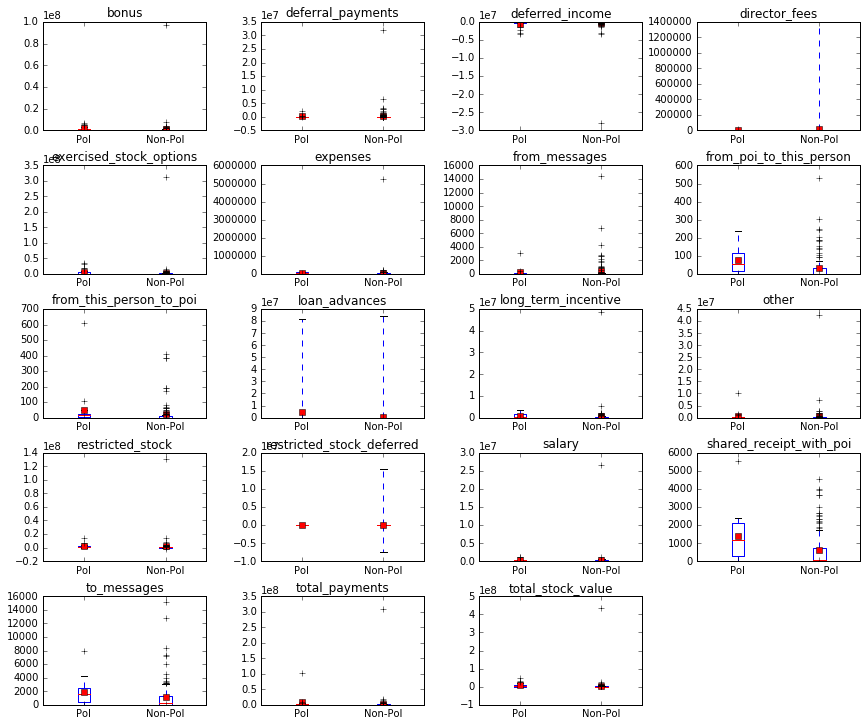

In [9]:
exploring_features(df[features_list])

In [10]:
### identify outlier values for each feature

col_names=["total_payments", "expenses", "from_messages", \
           "long_term_incentive", "restricted_stock","salary",\
           "to_messages","total_stock_value", "loan_advances"]

###### Methods to explore outliers
### print out index, 'poi' label, and value for max and min record of each feature.
def identifying_outliers(df, col_names):
    for col_name in col_names:
        idx_max = df[col_name].apply(NaN_to_Zero).argmax()
        idx_min = df[col_name].apply(NaN_to_Zero).argmin()
        print "*** %s\n max : %s, %s, %s" %(col_name, idx_max, df.loc[idx_max,'poi'], df.loc[idx_max, col_name])
        #print df.loc[idx_max]
        #print
        print " min : %s, %s, %s" %(idx_min, df.loc[idx_min,'poi'], df.loc[idx_min, col_name])
        #print
        #print df.loc[idx_min]

identifying_outliers(df, col_names)


*** total_payments
 max : TOTAL, False, 309886585
 min : CHAN RONNIE, False, NaN
*** expenses
 max : TOTAL, False, 5235198
 min : BAZELIDES PHILIP J, False, NaN
*** from_messages
 max : KAMINSKI WINCENTY J, False, 14368
 min : BADUM JAMES P, False, NaN
*** long_term_incentive
 max : TOTAL, False, 48521928
 min : BADUM JAMES P, False, NaN
*** restricted_stock
 max : TOTAL, False, 130322299
 min : BHATNAGAR SANJAY, False, -2604490
*** salary
 max : TOTAL, False, 26704229
 min : BADUM JAMES P, False, NaN
*** to_messages
 max : SHAPIRO RICHARD S, False, 15149
 min : BADUM JAMES P, False, NaN
*** total_stock_value
 max : TOTAL, False, 434509511
 min : BELFER ROBERT, False, -44093
*** loan_advances
 max : TOTAL, False, 83925000
 min : ALLEN PHILLIP K, False, NaN


In [11]:
#remove outlier : 'TOTAL'
print df.shape
df=df.drop(["TOTAL"])
print df.shape

###### exploring outliers after removing "total"
identifying_outliers(df, col_names)

(146, 20)
(145, 20)
*** total_payments
 max : LAY KENNETH L, True, 103559793
 min : CHAN RONNIE, False, NaN
*** expenses
 max : MCCLELLAN GEORGE, False, 228763
 min : BAZELIDES PHILIP J, False, NaN
*** from_messages
 max : KAMINSKI WINCENTY J, False, 14368
 min : BADUM JAMES P, False, NaN
*** long_term_incentive
 max : MARTIN AMANDA K, False, 5145434
 min : BADUM JAMES P, False, NaN
*** restricted_stock
 max : LAY KENNETH L, True, 14761694
 min : BHATNAGAR SANJAY, False, -2604490
*** salary
 max : SKILLING JEFFREY K, True, 1111258
 min : BADUM JAMES P, False, NaN
*** to_messages
 max : SHAPIRO RICHARD S, False, 15149
 min : BADUM JAMES P, False, NaN
*** total_stock_value
 max : LAY KENNETH L, True, 49110078
 min : BELFER ROBERT, False, -44093
*** loan_advances
 max : LAY KENNETH L, True, 81525000
 min : ALLEN PHILLIP K, False, NaN


In [12]:
## exclude features which its data is missing more than 70% in both 'poi' and 'non-poi'
features_to_exclude.extend(['deferral_payments', 'director_fees','loan_advances',\
                            'restricted_stock_deferred'])#, 'deferred_income'])

features_list=update_features_list(df, features_to_exclude)
print features_list

#df_selected_features=df[features_list]
df_selected=df[features_list]

#print df.shape,df_selected_features.shape,df_selected.shape

from -> ['bonus', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

to -> ['poi', 'bonus', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

20 15 16
['poi', 'bonus', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


num_of_features: 16, ncols: 4, nrows: 4


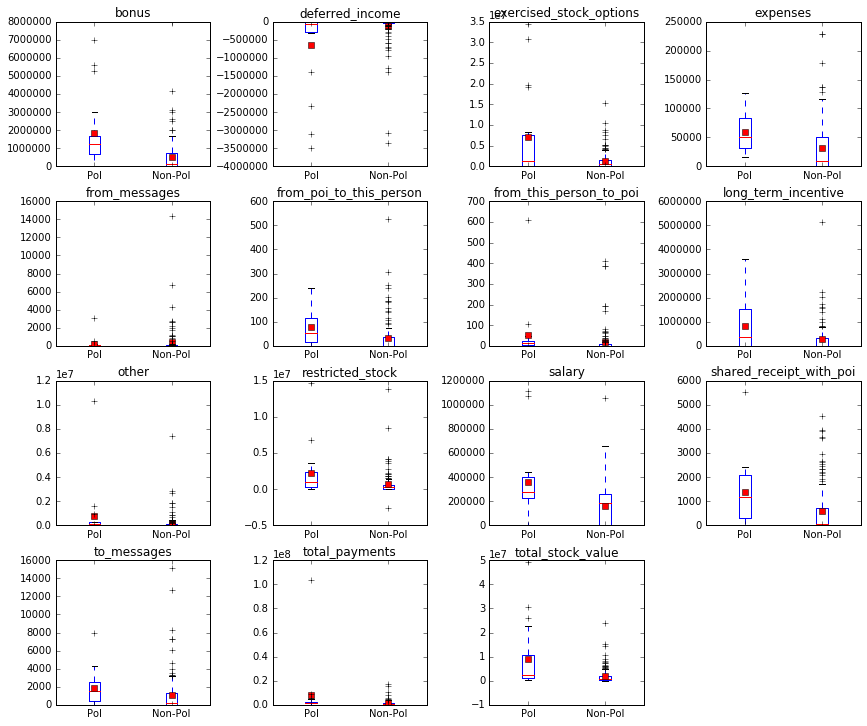

In [13]:
### re-exploring after removing outlier
exploring_features(df_selected)

In [14]:
### processing missing rows in features regarding mail : fill with median values
if True:
    from collections import defaultdict

    to_exclude = features_to_exclude#+['deferred_income']

    features_mail = ['from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',\
                     'shared_receipt_with_poi', 'to_messages']

    med_poi = defaultdict(float)
    med_non_poi = defaultdict(float)

    a= df[features_mail+['poi']]
    a[features_mail]= a[features_mail].astype(float)

    meds= a.groupby('poi').median()
    print meds.T

    for f in features_mail:
        med_poi[f] = meds.loc[True,f]
        med_non_poi[f] = meds.loc[False,f]

    ### spliting data frame by 'poi' values    
    pois = df_selected[df_selected['poi']==True]
    non_pois = df_selected[df_selected['poi']==False]
    
    ### replace NaN to median values of each 'poi' class
    for f in features_mail:
        #print
       #print pois[f]
        pois[f] = pois[f].apply(lambda x: med_poi[f] if x=="NaN" else x)
        #rint pois[f]
        non_pois[f] = non_pois[f].apply(lambda x: med_non_poi[f] if x=="NaN" else x)
        
    df_2 = pd.concat((pois,non_pois), axis=0)
    print df_2.shape
    df_selected = df_2
    
    
    #exploring_features(df_selected)
    exploring_missing_values(df_selected[features_list])
    #identifying_outliers(df_selected, df_selected.columns)

C:\Program Files\Anaconda2\lib\site-packages\pandas\core\frame.py:2369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


poi                      False   True 
from_messages             41.0    44.5
from_poi_to_this_person   26.5    62.0
from_this_person_to_poi    6.0    15.5
shared_receipt_with_poi  594.0  1589.0
to_messages              944.0  1875.0


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(145, 16)
**** Missing Values Exploration*****

Number of PoI : 18, Number of non-PoI: 127

                         non_poi_missing  non_poi_missing_prop  poi_missing  \
bonus                               62.0                  0.49          2.0   
deferred_income                     90.0                  0.71          7.0   
exercised_stock_options             38.0                  0.30          6.0   
expenses                            51.0                  0.40          0.0   
from_messages                        0.0                  0.00          0.0   
from_poi_to_this_person              0.0                  0.00          0.0   
from_this_person_to_poi              0.0                  0.00          0.0   
long_term_incentive                 74.0                  0.58          6.0   
other                               53.0                  0.42          0.0   
poi                                  0.0                  0.00          0.0   
restricted_stock                    35.

# Task 3: Create new feature(s)

In [15]:
### Store to my_dataset for easy export below.

### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

my_dataset = df_selected.T.to_dict()
print features_list
#print my_dataset[my_dataset.keys()[0]]


### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

['poi', 'bonus', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


In [16]:
##### getting importance of features

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced')
print clf
clf.fit(features,labels)

print
print "features: ", clf.max_features_
print
print "importance of features"
for idx, val in sorted(enumerate(clf.feature_importances_), key=lambda variable: -variable[1]):
    print "%s : %.4f" %(features_list[idx+1], val)


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

features:  15

importance of features
shared_receipt_with_poi : 0.5928
expenses : 0.1314
other : 0.0854
from_this_person_to_poi : 0.0785
from_poi_to_this_person : 0.0573
from_messages : 0.0546
bonus : 0.0000
deferred_income : 0.0000
exercised_stock_options : 0.0000
long_term_incentive : 0.0000
restricted_stock : 0.0000
salary : 0.0000
to_messages : 0.0000
total_payments : 0.0000
total_stock_value : 0.0000


In [17]:
### exclude features with zero importance

#features_to_exclude.extend(['long_term_incentive','other', 'restricted_stock','salary', 'to_messages','total_stock_value'])
features_to_exclude.extend(['total_stock_value','total_payments','to_messages','salary', 'restricted_stock', 
                            'long_term_incentive', 'exercised_stock_options', 'deferred_income','bonus'])

features_list=update_features_list(df, features_to_exclude)
print features_list


from -> ['expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'shared_receipt_with_poi']

to -> ['poi', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'shared_receipt_with_poi']

20 6 7
['poi', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'shared_receipt_with_poi']


In [18]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [19]:
### split train and test set

from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
## creating StratifiedShuffleSplit object to use in GridSearch
s= StratifiedShuffleSplit(labels, n_iter=3, test_size=.3, random_state=0)

# Task 4: Try a varity of classifiers

> Please name your classifier clf for easy export below.
> Note that if you want to do PCA or other multi-stage operations,
>  you'll need to use Pipelines. For more info:
>  http://scikit-learn.org/stable/modules/pipeline.html
> Provided to give you a starting point. Try a variety of classifiers.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import RandomizedPCA
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import classification_report as rp

precisions = []
recalls = []

### creating scoring function
def my_scorer_func (test_label, prediction):
    precision = precision_score(test_label, prediction, labels=None, pos_label=1,\
                                average='binary', sample_weight=None)
    recall = recall_score(test_label, prediction, labels=None, pos_label=1,\
                          average='binary', sample_weight=None)
    score = 1/(((1/precision)+(1/recall))/2)
    
    precisions.append(precision)
    recalls.append(recall)
    ### put weight if both precision and recall are over 0.3
    if precision >.3 and recall>.3:
        score *= 100
    #print "precision: %.4f, recall: %.4f" %(precision, recall)
    return score

my_scorer = make_scorer(my_scorer_func, greater_is_better= True)

In [21]:
### build classification a model for each input parameter.
### and find the best model with the best score.

def run_training(algo, parameters, scorer=my_scorer):
    clf = GridSearchCV(algo, parameters, scoring =scorer, cv = s)                               
    clf.fit(features, labels)

    print
    print "Estimator: ", clf.best_estimator_
    #print
    #print clf.best_params_
    print
    #print "mean score: %.4f" %(clf.best_score_)
    
    for result in clf.grid_scores_ :
        m = result.mean_validation_score
        std = np.std(result.cv_validation_scores)
        
        if abs(clf.best_score_-m) < .00001:
            print ">> mean score : %.4f, std: %.4f" %(m,std)
   
    return clf.best_estimator_    

In [22]:
##### Gaussain Naive Bayes

from sklearn.naive_bayes import GaussianNB
precisions = []
recalls = []

algo = GaussianNB()
parameters={}
run_training(algo, parameters, scorer=my_scorer)

##### classifer built on PCA ####
estimators = [('reduce_dim', RandomizedPCA()), ('algo', algo)]
parameters = dict(reduce_dim__n_components=[2, 5, 10]
                 , reduce_dim__whiten=[True,False])

clf = Pipeline(estimators)
best_clf = run_training(clf, parameters, scorer=my_scorer)

print mean(precisions)*100, mean(recalls)*100


Estimator:  GaussianNB()

>> mean score : 0.1619, std: 0.1197

Estimator:  Pipeline(steps=[('reduce_dim', RandomizedPCA(copy=True, iterated_power=3, n_components=10, random_state=None,
       whiten=True)), ('algo', GaussianNB())])

>> mean score : 0.1766, std: 0.1297
5.07180650038 6.66666666667


C:\Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
##### Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier()

parameters ={'class_weight': ('balanced',None), 
             'max_features' : range(2,len(features_list)),
             'min_samples_split' : range(2,11)
             }
precisions = []
recalls = []

best_clf = run_training(algo, parameters, scorer=my_scorer)

print mean(precisions)*100, mean(recalls)*100



Estimator:  DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

>> mean score : 77.5758, std: 3.4284
56.4705119983 54.0


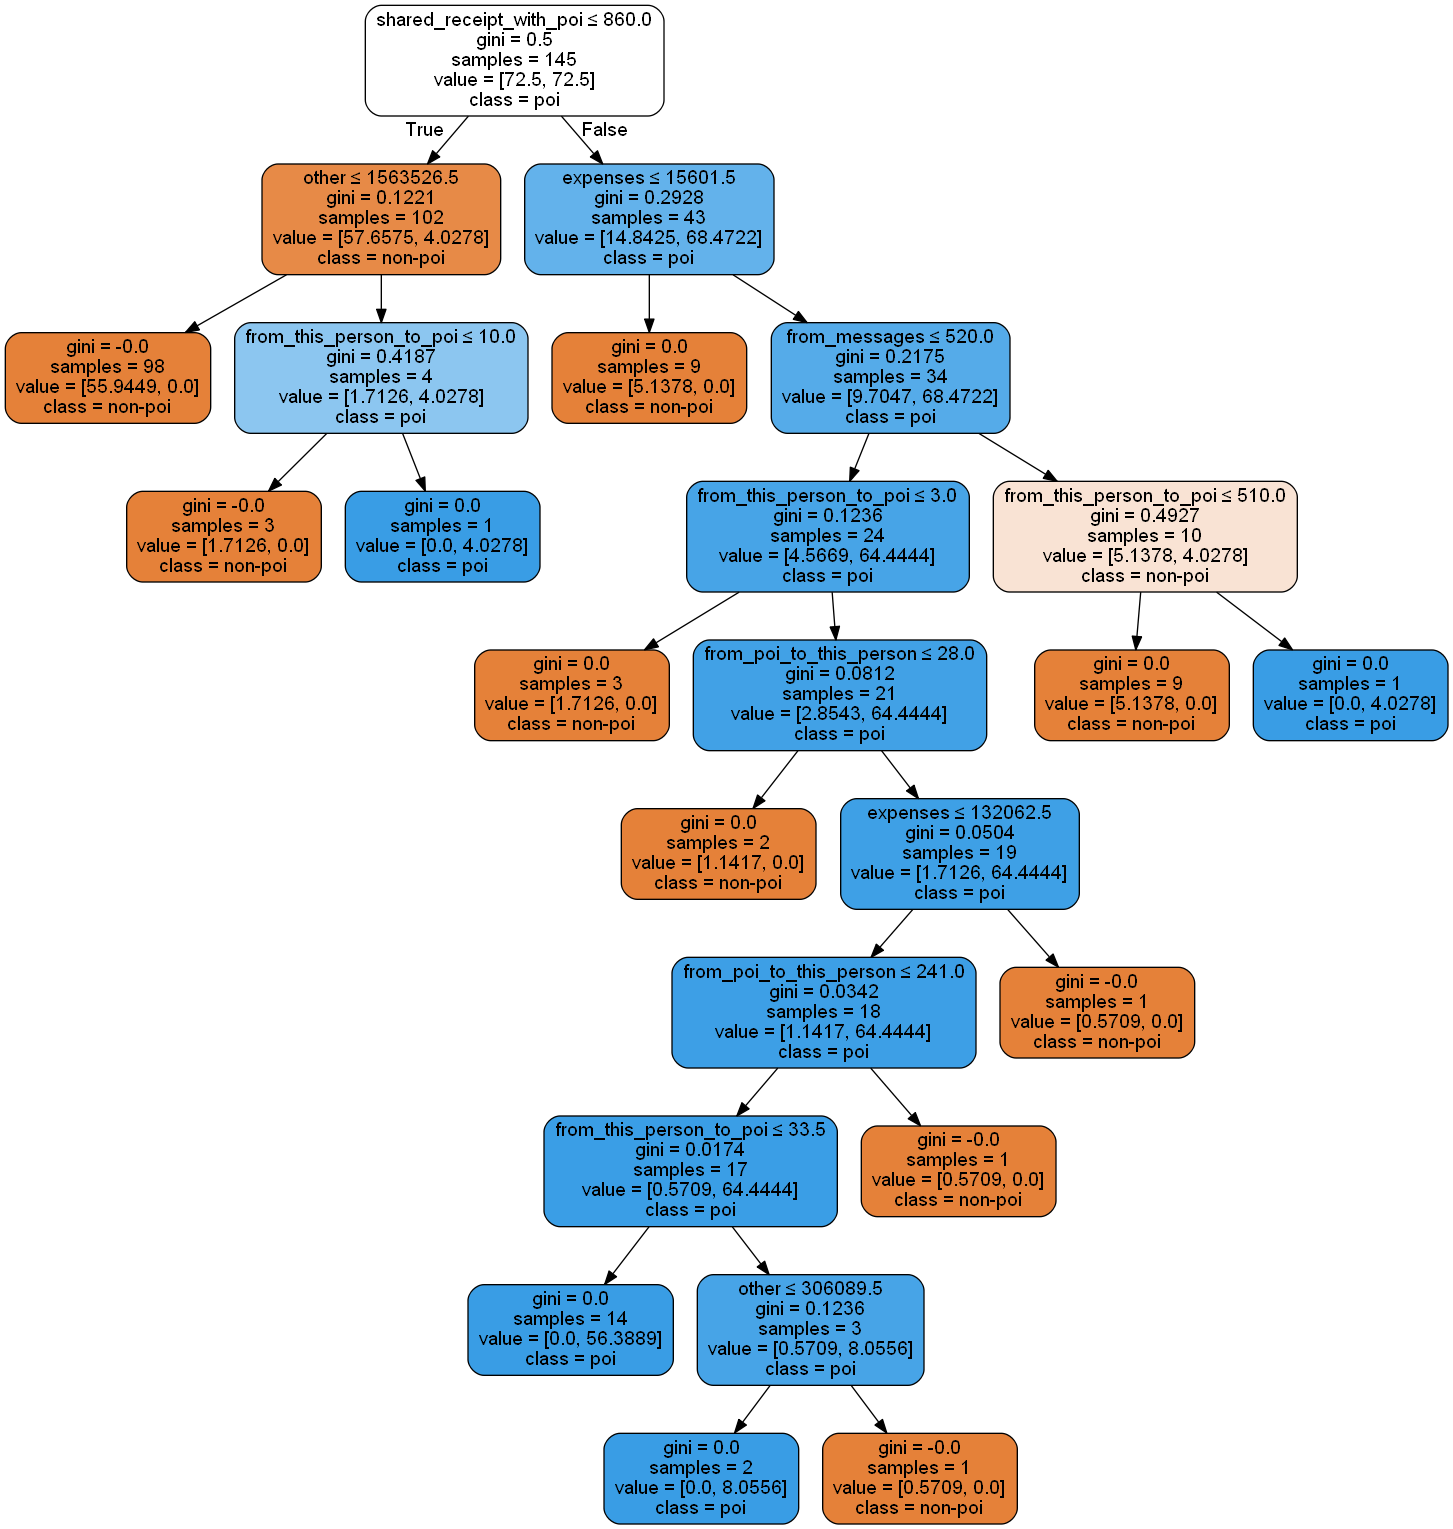

In [24]:
###### Visualize decision tree

from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn import tree
import pydot
import os


with open("enron.dot", 'w') as f:
    f = tree.export_graphviz(best_clf, out_file=f)
os.unlink('enron.dot')

dot_data = StringIO()

tree.export_graphviz(best_clf, out_file=dot_data,  
                         feature_names=features_list[1:],
                         class_names = ['non-poi','poi'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  


In [57]:
##### classifer built on PCA ####
parameters = dict(reduce_dim__n_components=[2, 5, 10]
                  , reduce_dim__whiten=(True,False)
                  , algo__class_weight=('balanced',None)
                  , algo__max_features = (None, 'auto','log2')
                  , algo__min_samples_split=range(2,11)
                 )

estimators = [('reduce_dim', RandomizedPCA()), ('algo', algo)]
clf = Pipeline(estimators)
best_clf = run_training(clf, parameters, scorer=my_scorer)
best_clf


Estimator:  Pipeline(steps=[('reduce_dim', RandomizedPCA(copy=True, iterated_power=3, n_components=10, random_state=None,
       whiten=False)), ('algo', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

>> mean score : 67.8114, std: 15.0694


Pipeline(steps=[('reduce_dim', RandomizedPCA(copy=True, iterated_power=3, n_components=10, random_state=None,
       whiten=False)), ('algo', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

In [62]:
##### Random Forest

from sklearn.ensemble import RandomForestClassifier

algo =  RandomForestClassifier()
parameters =dict( class_weight = ('balanced',None)
                 , max_features = (None, 'auto','log2')
                 , min_samples_split = range(2,11)
             )

precisions = []
recalls = []

best_clf = run_training(algo, parameters, scorer=my_scorer)

print "mean precision: ", mean(precisions), "mean recall: ",mean(recalls)


Estimator:  RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

>> mean score : 79.4444, std: 3.4247
mean precision:  0.765255731922 mean recall:  0.553086419753


In [27]:
##### classifer built on PCA ####
parameters = dict(reduce_dim__n_components=[2, 5, 10]
                  , reduce_dim__whiten=(True,False)
                  , algo__class_weight=('balanced',None)
                  , algo__max_features = (None, 'auto','log2')
                  , algo__min_samples_split=range(2,11)
                  #, algo__n_estimators = (10,20)
                  #, algo__n_jobs = [5]
                 )

estimators = [('reduce_dim', RandomizedPCA()), ('algo', algo)]
clf = Pipeline(estimators)
run_training(clf, parameters, scorer=my_scorer)


Estimator:  Pipeline(steps=[('reduce_dim', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=True)), ('algo', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

>> mean score : 65.5556, std: 12.2726


Pipeline(steps=[('reduce_dim', RandomizedPCA(copy=True, iterated_power=3, n_components=5, random_state=None,
       whiten=True)), ('algo', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [28]:
##### ADABOOST

from sklearn.ensemble import AdaBoostClassifier

algo =  AdaBoostClassifier()
parameters =dict(n_estimators= range(50, 201, 50)             
                 , learning_rate= [.1, .4, .7, 1.0]
                 #,'algorithm' : ('SAMME', 'SAMME.R') 
                )

run_training(algo, parameters, scorer=my_scorer)


##### classifer built on PCA ####
parameters = dict(reduce_dim__n_components=[2, 5, 10]
                  , reduce_dim__whiten=(True,False)
                  , algo__n_estimators= range(50, 201, 50)
                  , algo__learning_rate = [.1, .4, .7, 1.0]
                 )

estimators = [('reduce_dim', RandomizedPCA()), ('algo', algo)]
clf = Pipeline(estimators)
run_training(clf, parameters, scorer=my_scorer)


Estimator:  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=100, random_state=None)

>> mean score : 71.1111, std: 6.2854
>> mean score : 71.1111, std: 6.2854
>> mean score : 71.1111, std: 6.2854

Estimator:  Pipeline(steps=[('reduce_dim', RandomizedPCA(copy=True, iterated_power=3, n_components=10, random_state=None,
       whiten=True)), ('algo', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=100, random_state=None))])

>> mean score : 63.4921, std: 4.4896


Pipeline(steps=[('reduce_dim', RandomizedPCA(copy=True, iterated_power=3, n_components=10, random_state=None,
       whiten=True)), ('algo', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=100, random_state=None))])

# Task 5: Tune your classifier to achieve better than .3 precision and recall 
> using our testing script. Check the tester.py script in the final project
> folder for details on the evaluation method, especially the test_classifier
> function. Because of the small size of the dataset, the script uses
> stratified shuffle split cross validation. For more info: 
> http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


# Task 6: Dump your classifier, dataset, and features_list

> so anyone can check your results. You do not need to change anything below, but make sure  that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.


In [59]:

if True:
    clf_ab = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=100, random_state=None)
    

    clf_dt= DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    
    
    clf_dt = DecisionTreeClassifier(class_weight='balanced', criterion='gini',
        max_depth=None, max_features=3, max_leaf_nodes=None,
        min_samples_leaf=1, min_samples_split=2,
        min_weight_fraction_leaf=0.0, presort=False, random_state=None,
        splitter='best')
    
    
    clf_rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


    
dump_classifier_and_data(clf_rf, my_dataset, features_list)